# Phase 1 Exploratory Data Analysis


In [38]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as mn
import os
import yellowbrick 
import matplotlib
#import pydotplus
#import graphviz 


from pandas.plotting import scatter_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading the Data

In [3]:
#7 CSV Files Saved Locally on Desktop
dfstudentinfo = pd.read_csv("studentInfo.csv")
dfstudentasses = pd.read_csv("studentAssessment.csv")
dfvle = pd.read_csv("vle.csv")
dfstudentvle = pd.read_csv("studentVle.csv")
dfstudentreg = pd.read_csv ("studentRegistration.csv")
dfcourses = pd.read_csv ("courses.csv")
dfasses = pd.read_csv ("assessments.csv")

In [4]:
#checking present working drive to properly set path to load data
%pwd

'/Users/marcrivera/Desktop/University-Learning-Analytics/code/exploratory data analysis'

## Value Counts and Distribution 

In [4]:
dfstudentinfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [25]:
# check data type for each feature

dfstudentinfo.dtypes

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

In [16]:
dfstudentinfo.shape

(32593, 12)

In [5]:
#Total Number of Registered Students, note that some students had the ability to withdraw and retake modules.
dfstudentinfo['id_student'].count()

32593

In [6]:
#Total Number of Students 
dfstudentinfo['id_student'].nunique()

28785

In [7]:
#max number of previous attemps a student attempted a module
dfstudentinfo['num_of_prev_attempts'].max()

6

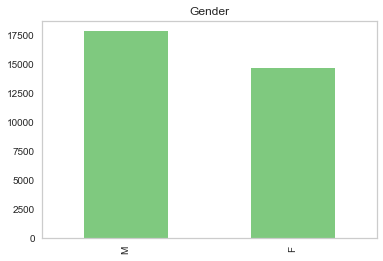

In [36]:
#Gender Distribution
dfstudentinfo['gender'].value_counts().plot(kind='bar', title='Gender', colormap=('Accent'))
plt.grid(b=None)

In [35]:
#Gender Counts
dfstudentinfo['gender'].value_counts()

M    17875
F    14718
Name: gender, dtype: int64

In [37]:
#3164 students registered and disclosed they had a disablity
dfstudentinfo['disability'].value_counts()

N    29429
Y     3164
Name: disability, dtype: int64

In [40]:
#general descriptive statistics for studied credits - number of credits for the module the student is currently studying 
dfstudentinfo['studied_credits'].describe()

count    32593.000000
mean        79.758691
std         41.071900
min         30.000000
25%         60.000000
50%         60.000000
75%        120.000000
max        655.000000
Name: studied_credits, dtype: float64

## Demographic Data on Regions

In [10]:
#Total number of Regions
dfstudentinfo['region'].nunique()

13

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64


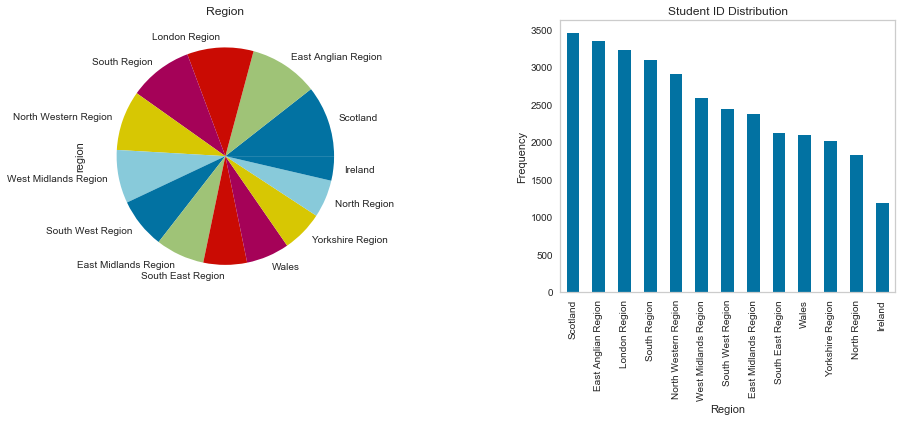

In [6]:
#data distribution of regions
presentation_counts = dfstudentinfo['region'].value_counts()
print (presentation_counts)

#created pie chart and histogram charts. Compare both visuals to see which is better at displaying the data.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
presentation_counts.plot(kind='pie')
plt.title('Region')


plt.subplot(1,2,2)
presentation_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Student ID Distribution')
plt.grid(b=None)
# add more space between the two plots
plt.subplots_adjust(wspace=0.5)
#plt.savefig("~myplot.png")

Text(0.5, 1.0, 'Final Result Distribution Per Region')

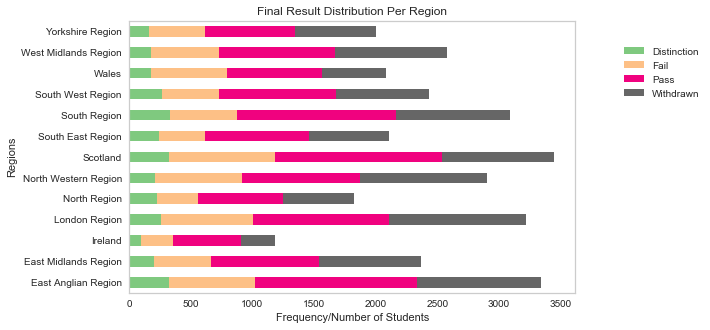

In [10]:
#Plotting the stacked Final Result Distrubution of Registered Students per Region
dfstudentinfo.groupby(['region','final_result']).size().unstack().plot(kind='barh',stacked=True, colormap='Accent', figsize = (8,5))
plt.grid(b=None)
plt.legend(loc = (1.1, 0.7)) 
plt.ylabel("Regions")
plt.xlabel("Frequency/Number of Students")
plt.title("Final Result Distribution Per Region")
#plt.savefig("~rft.png")

In [11]:
#Reviewing Value Counts of the Final Result per Region for Registered Students
dfstudentinfo.groupby(['region', 'final_result'])['final_result'].count()

region                final_result
East Anglian Region   Distinction      327
                      Fail             698
                      Pass            1309
                      Withdrawn       1006
East Midlands Region  Distinction      200
                      Fail             462
                      Pass             881
                      Withdrawn        822
Ireland               Distinction       98
                      Fail             261
                      Pass             552
                      Withdrawn        273
London Region         Distinction      263
                      Fail             744
                      Pass            1099
                      Withdrawn       1110
North Region          Distinction      230
                      Fail             327
                      Pass             691
                      Withdrawn        575
North Western Region  Distinction      213
                      Fail             704
                   

## Highest Education Level on Entry

The Highest Education feature column is the student's education level upon entry to the module presentation.



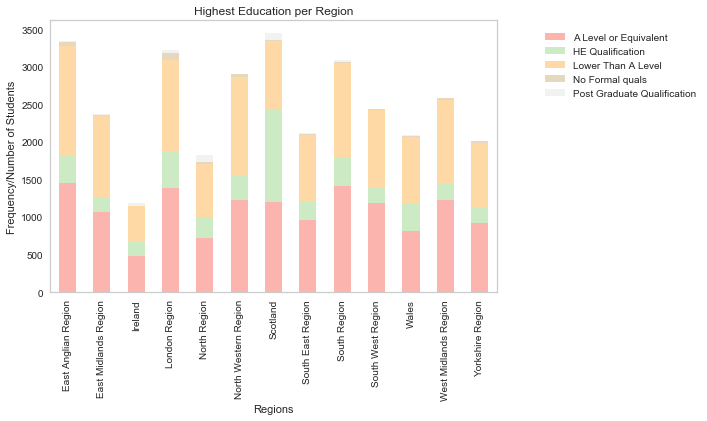

In [11]:
#The following is the stacked Highest Education Distribution chart per region.
dfstudentinfo.groupby(['region','highest_education']).size().unstack().plot(kind='bar',stacked=True, colormap = 'Pastel1', figsize =(8,5))
plt.grid(b=None)
plt.legend(loc = (1.1, 0.7)) 
plt.ylabel("Frequency/Number of Students")
plt.xlabel("Regions")
plt.title("Highest Education per Region")
plt.show()

## Poverty Index Indicator IMD Band

The IMD Band (Index of Multiple Depravation Band) ranks different regions by decile. 0-10% being the most deprived and 90-100% being the least deprived.

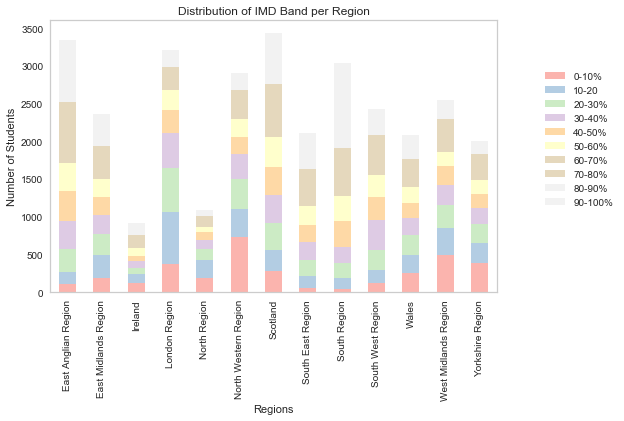

In [14]:
#Viewing the distribution of IMD Band per Region 
dfstudentinfo.groupby(['region','imd_band',]).size().unstack().plot(kind='bar',stacked=True, colormap = 'Pastel1', figsize = (8,5))
plt.grid(b=None)
plt.legend(loc = (1.1, 0.3)) 
plt.ylabel("Number of Students")
plt.xlabel("Regions")
plt.title("Distribution of IMD Band per Region")
plt.show()


## Code Modules
The Code Module is grouped into 7 codes and have two domains, Social Science & STEM. AAA BBB & GGG fall under Social Science, while CCC, DDD, EEE, FFF are STEM modules. 

Text(0.5, 1.0, 'Final Result Distribution per Code Module')

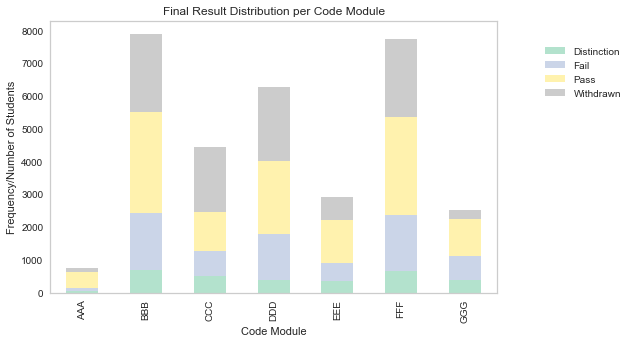

In [8]:
#Final Result Distribution per Code Module

dfstudentinfo.groupby(['code_module','final_result']).size().unstack().plot(kind='bar',stacked=True, colormap = 'Pastel2',figsize = (8,5))
plt.grid(b=None)
plt.legend(loc = (1.1, 0.7)) 
plt.ylabel("Frequency/Number of Students")
plt.xlabel("Code Module")
plt.title("Final Result Distribution per Code Module")
#plt.savefig("~rft.png")


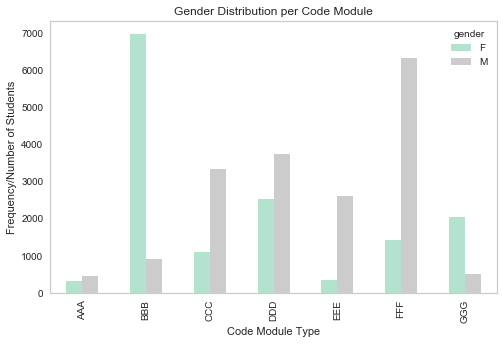

In [12]:
#Gender Distribution per Code Module. 

dfstudentinfo.groupby(['code_module','gender']).size().unstack().plot(kind='bar',stacked=False, colormap='Pastel2', figsize = (8,5))
plt.grid(b=None)
plt.ylabel("Frequency/Number of Students")
plt.xlabel("Code Module Type")
plt.title("Gender Distribution per Code Module")
plt.show() 

In [15]:
#Gender Counts per Code Module
dfstudentinfo.groupby(['code_module', 'gender'])['gender'].count()

code_module  gender
AAA          F          314
             M          434
BBB          F         6991
             M          918
CCC          F         1101
             M         3333
DDD          F         2518
             M         3754
EEE          F          337
             M         2597
FFF          F         1414
             M         6348
GGG          F         2043
             M          491
Name: gender, dtype: int64

In [13]:
#Total Registered Student Counts per Code Module
dfstudentinfo.groupby(['code_module',])['code_module'].count()

code_module
AAA     748
BBB    7909
CCC    4434
DDD    6272
EEE    2934
FFF    7762
GGG    2534
Name: code_module, dtype: int64

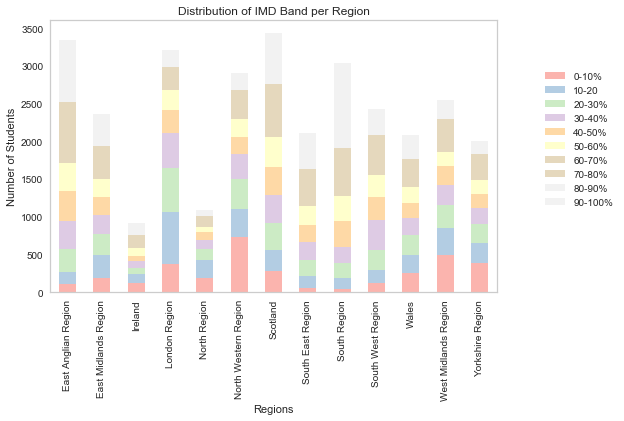

In [16]:
#check pass and fail ratio for students in diffent regions
dfstudentinfo.groupby(['region','imd_band',]).size().unstack().plot(kind='bar',stacked=True, colormap = 'Pastel1', figsize = (8,5))
plt.grid(b=None)
plt.legend(loc = (1.1, 0.3)) 
plt.ylabel("Number of Students")
plt.xlabel("Regions")
plt.title("Distribution of IMD Band per Region")
plt.show()


## Examining Null Values

MissingNo - Python package used to visualize missning elements in a dataset.

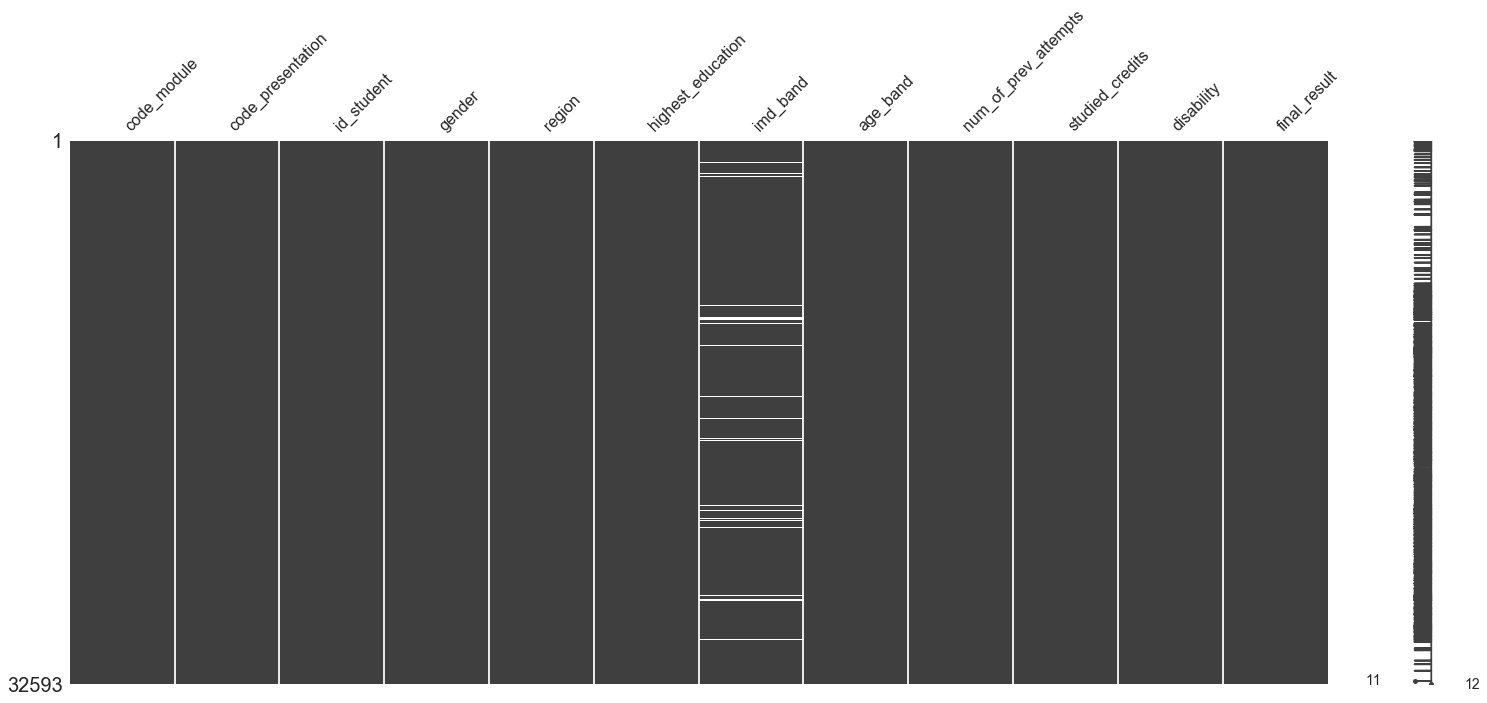

In [17]:
#examine missing values in dataset 
mn.matrix(dfstudentinfo)

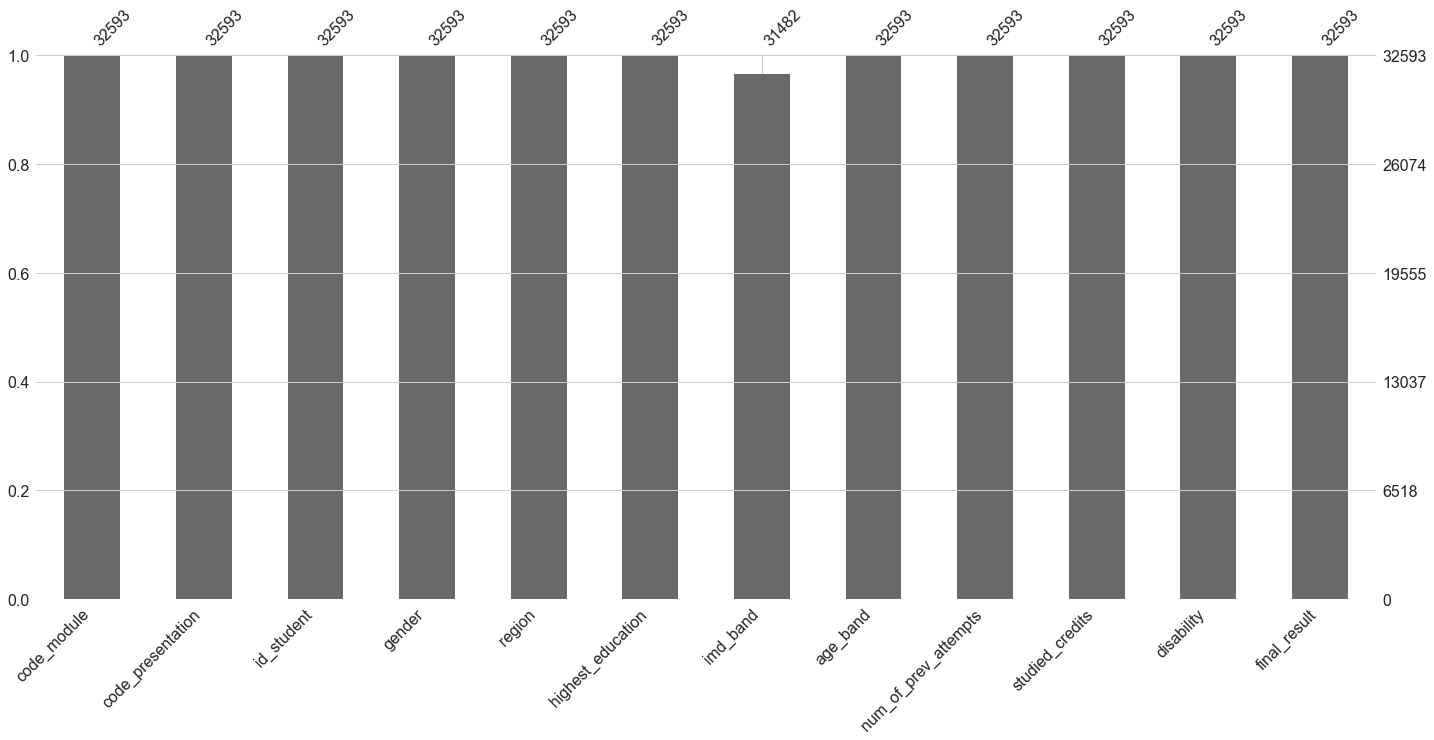

In [18]:
#counts of missing values and all rows
mn.bar(dfstudentinfo)

## Plotting Histograms for Dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125db9518>,
      dtype=object)

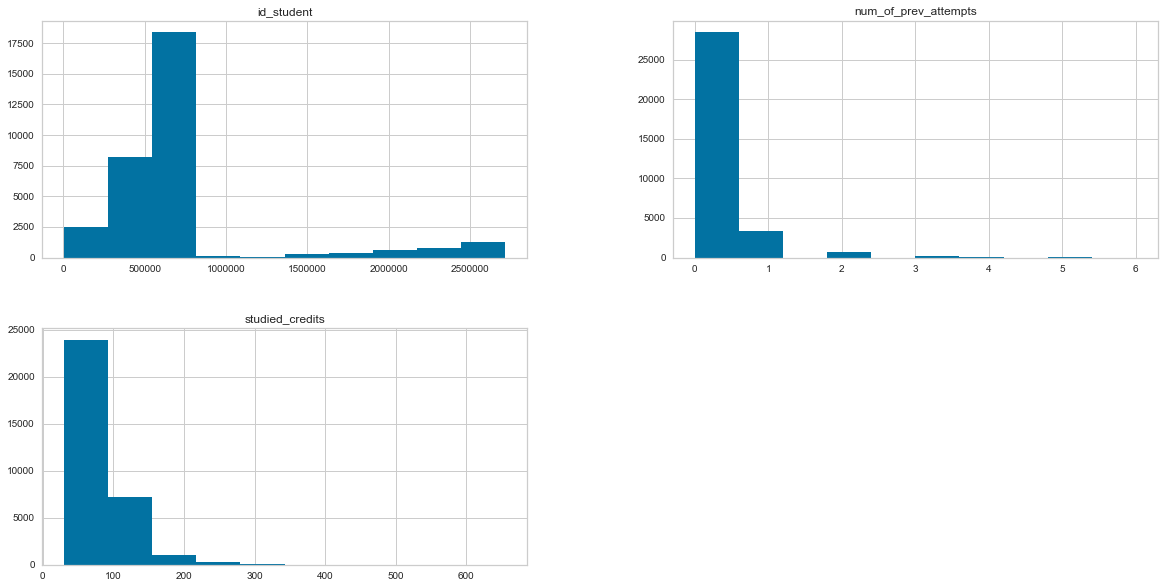

In [19]:
dfstudentinfo.hist(figsize=(20,10)) # Histogram for all features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129445b38>,
      dtype=object)

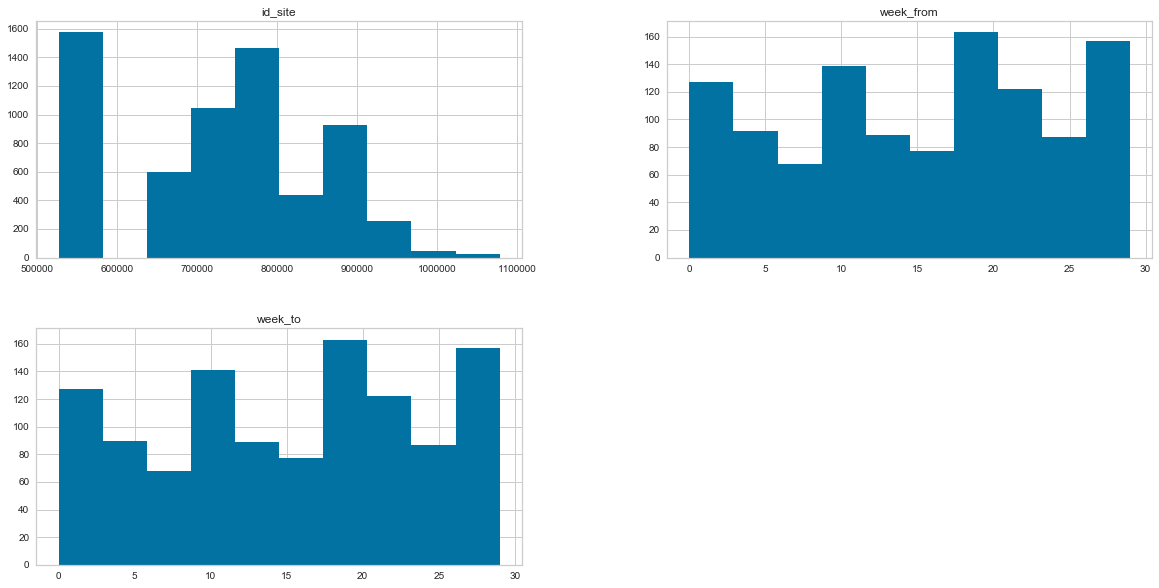

In [20]:
dfvle.hist(figsize=(20,10)) # Histogram for all features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1269e7438>,
      dtype=object)

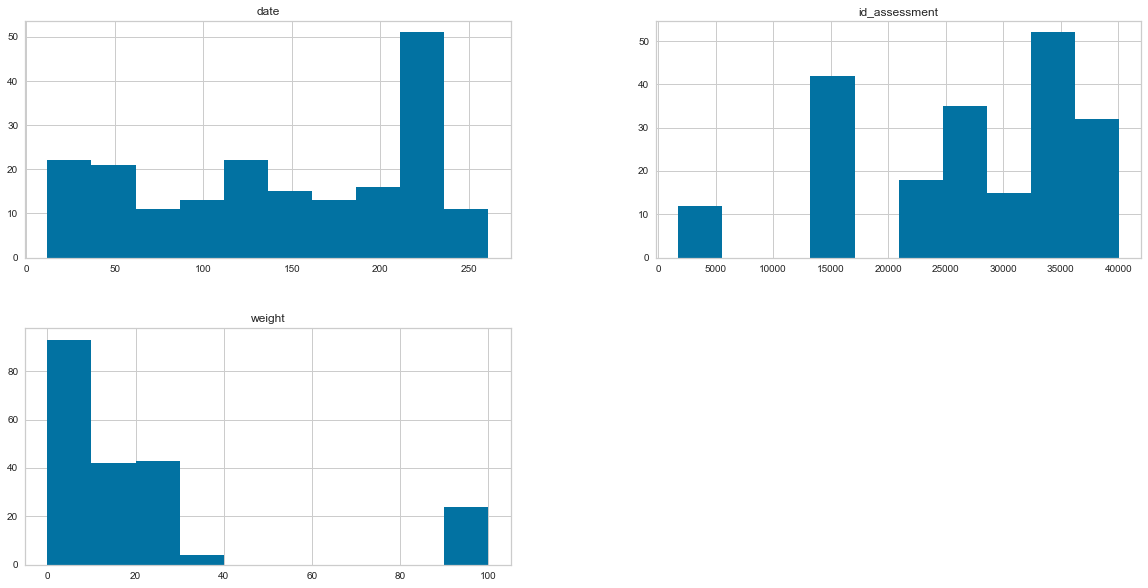

In [21]:
dfasses.hist(figsize=(20,10)) # Histogram for all features